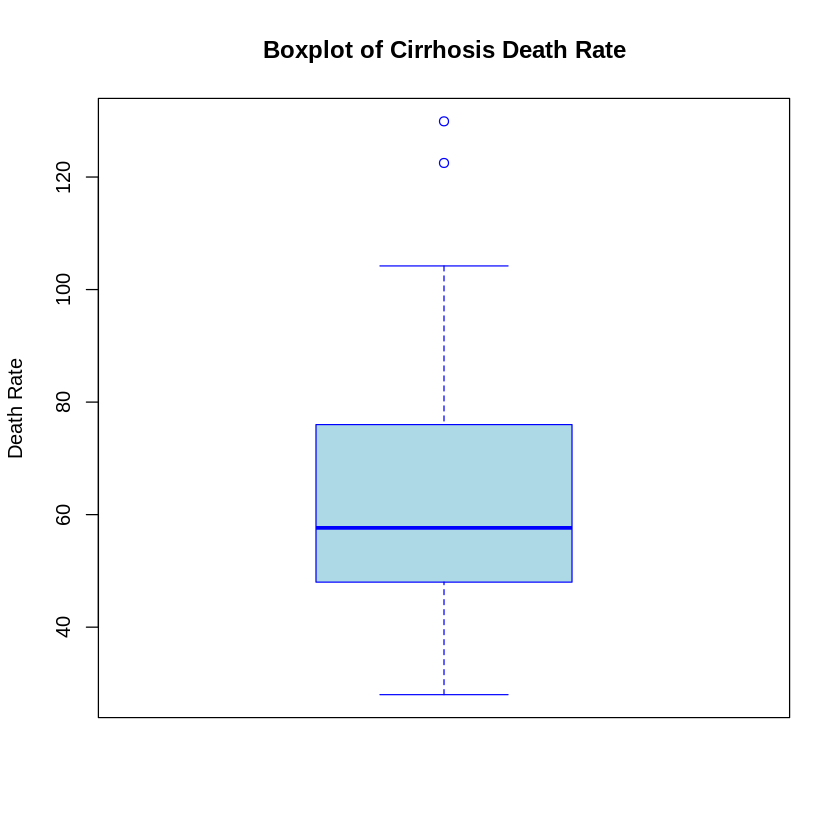

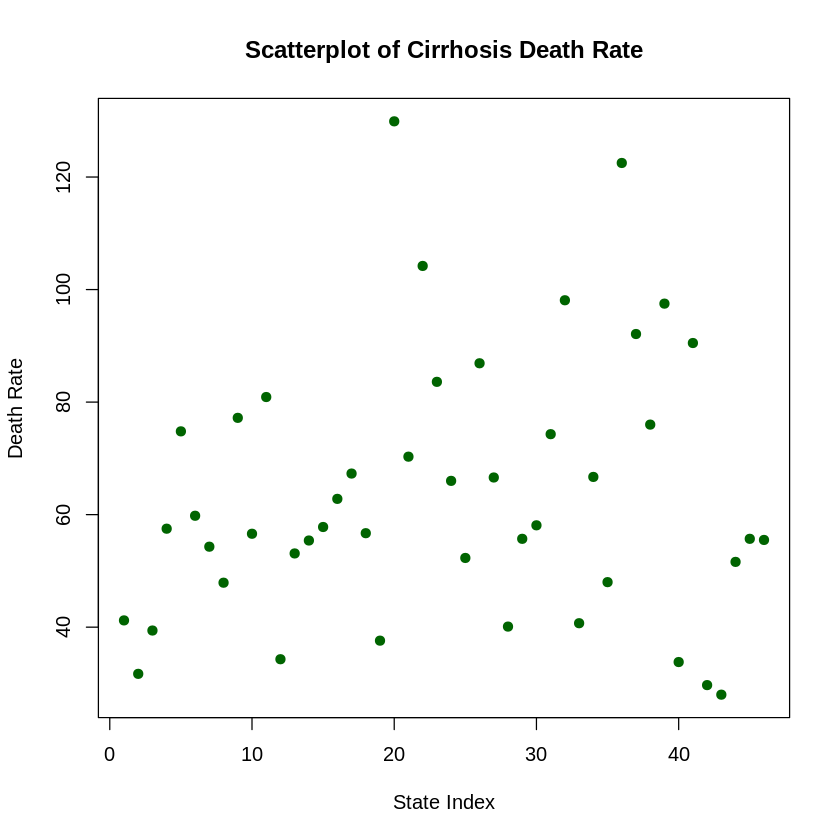

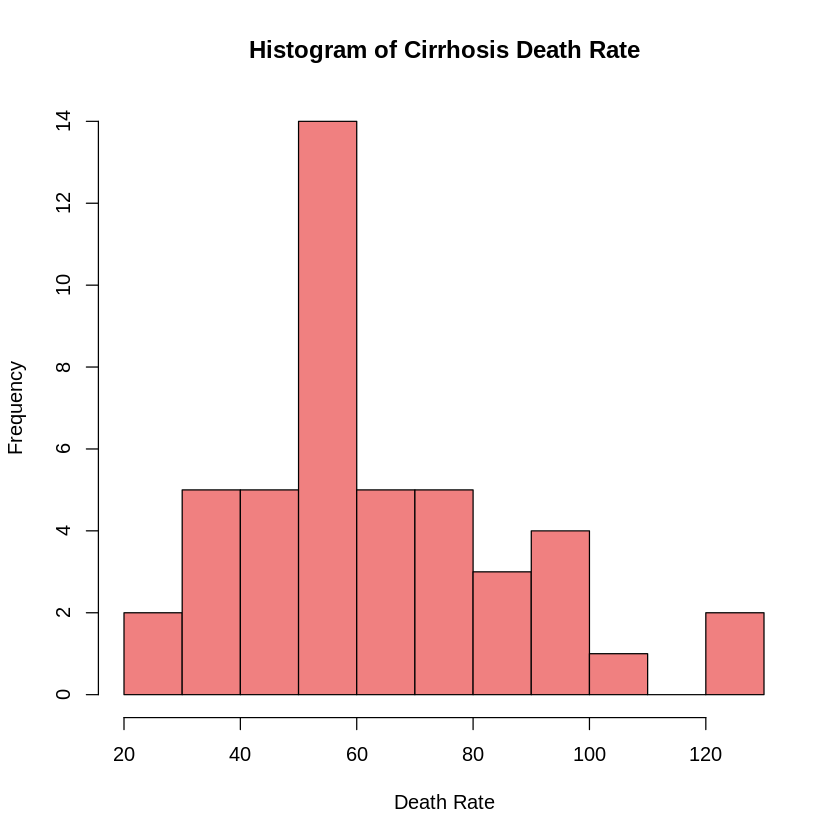

In [ ]:
# Cirrhosis death rate data
death_rate <- c(41.2, 31.7, 39.4, 57.5, 74.8, 59.8, 54.3, 47.9, 77.2, 56.6, 80.9, 34.3,
                53.1, 55.4, 57.8, 62.8, 67.3, 56.7, 37.6, 129.9, 70.3, 104.2, 83.6, 66.0,
                52.3, 86.9, 66.6, 40.1, 55.7, 58.1, 74.3, 98.1, 40.7, 66.7, 48.0, 122.5,
                92.1, 76.0, 97.5, 33.8, 90.5, 29.7, 28.0, 51.6, 55.7, 55.5)

# Boxplot
boxplot(death_rate,
        main = "Boxplot of Cirrhosis Death Rate",
        ylab = "Death Rate",
        col = "lightblue",
        border = "blue")

# Scatterplot
plot(death_rate,
     main = "Scatterplot of Cirrhosis Death Rate",
     xlab = "State Index",
     ylab = "Death Rate",
     pch = 19,
     col = "darkgreen")

# Histogram
hist(death_rate,
     main = "Histogram of Cirrhosis Death Rate",
     xlab = "Death Rate",
     ylab = "Frequency",
     col = "lightcoral",
     border = "black",
     breaks = 10)


In [ ]:
# Five-number summary
fivenum(death_rate)

[1]  28.00  48.00  57.65  76.00 129.90

In [ ]:
# Sample statistics
mean_value <- mean(death_rate)           # Sample mean
variance_value <- var(death_rate)        # Sample variance (uses n-1)
sd_value <- sd(death_rate)               # Sample standard deviation

# Display results
mean_value
variance_value
sd_value

[1] 63.49348

[1] 549.8077

[1] 23.44798

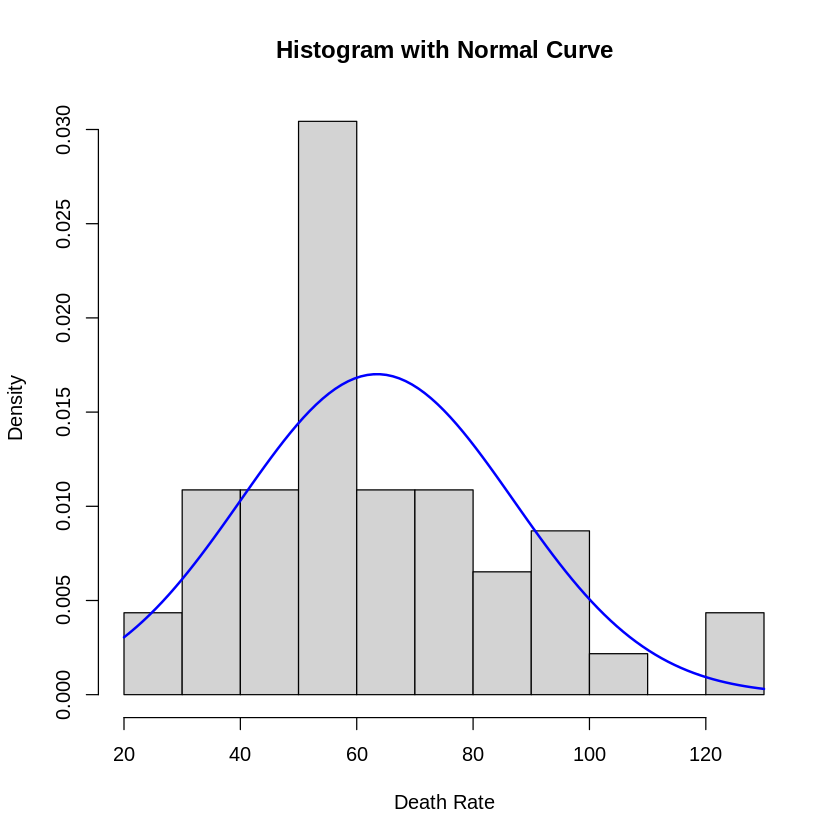


	Shapiro-Wilk normality test

data:  death_rate
W = 0.94463, p-value = 0.02923


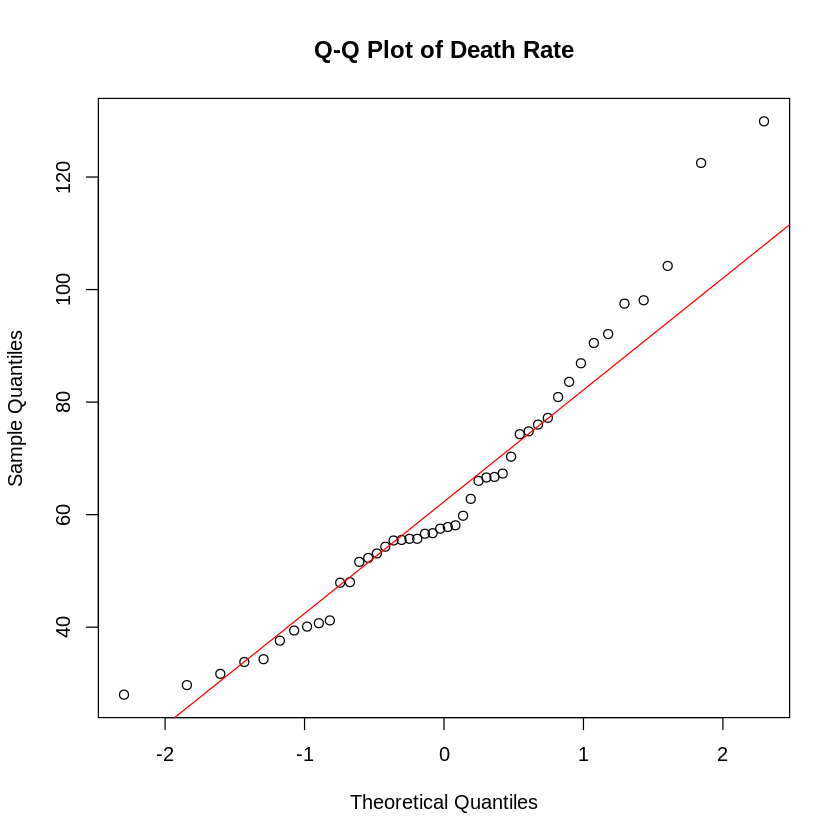

In [ ]:
# Histogram with normal curve
hist(death_rate, breaks = 10, col = "lightgray", freq = FALSE,
     main = "Histogram with Normal Curve", xlab = "Death Rate")
curve(dnorm(x, mean = mean(death_rate), sd = sd(death_rate)),
      col = "blue", lwd = 2, add = TRUE)

qqnorm(death_rate, main = "Q-Q Plot of Death Rate")
qqline(death_rate, col = "red")

shapiro.test(death_rate)



In [ ]:
# Data
mean_val <- 63.49
sd_val <- 23.45
n <- 46

# Degrees of freedom
df <- n - 1

# t critical value
t_critical <- qt(0.975, df)

# Margin of error
margin_error <- t_critical * sd_val / sqrt(n)

# Confidence interval
lower <- mean_val - margin_error
upper <- mean_val + margin_error

c(lower, upper)


[1] 56.52621 70.45379

 Compute the probability that the true mean is within one standard deviation.

In [ ]:
# Given values
sample_mean <- 63.49
sample_sd <- 23.45
n <- 46

# Step 1: Compute Standard Error (SE)
se <- sample_sd / sqrt(n)
se

# Step 2: Standard Normal Probability (Z within ±1)
# Since it's one SE, it's equivalent to P(-1 < Z < 1)
prob <- pnorm(1) - pnorm(-1)
prob

# Output results
cat("Standard Error:", round(se, 3), "\n")
cat("P(-1 < Z < 1):", round(prob, 4), "or", round(prob*100, 2), "%\n")


[1] 3.457514

[1] 0.6826895

Standard Error: 3.458 
P(-1 < Z < 1): 0.6827 or 68.27 %


In [ ]:
# R code
t_stat <- (63.49 - 48.33) / (23.45 / sqrt(46))
p_value <- pt(t_stat, df = 45, lower.tail = TRUE)  # Left-tailed


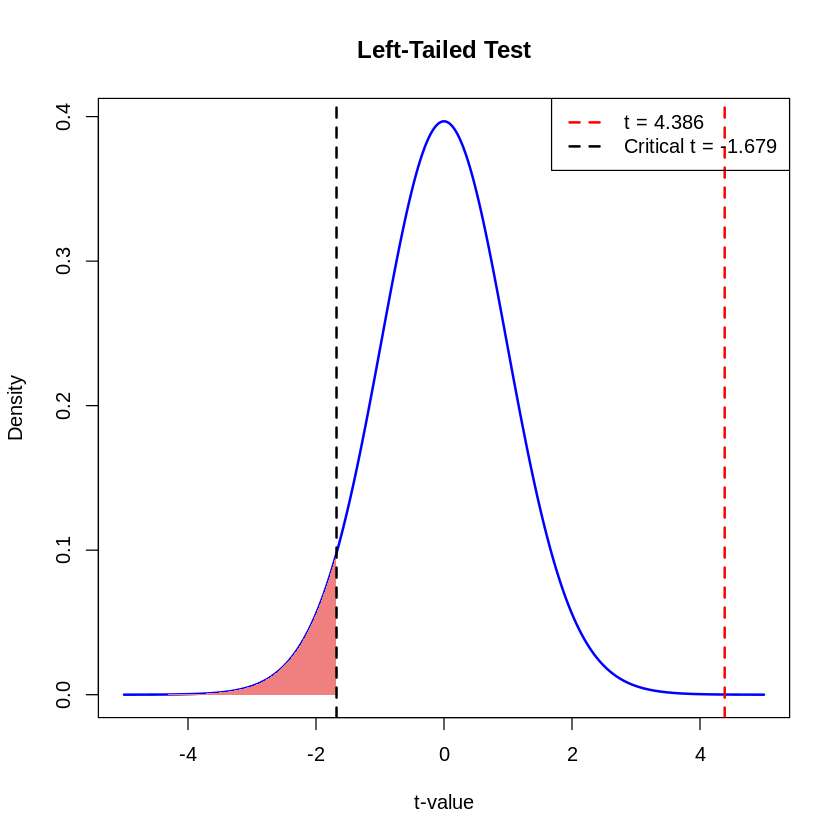

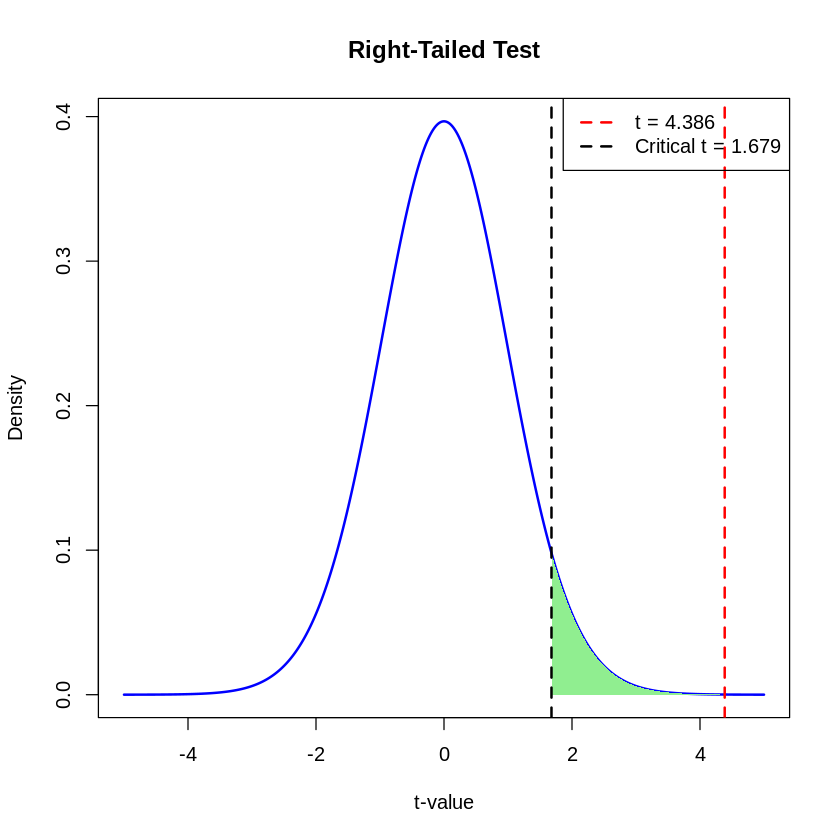

In [ ]:
# Load libraries
library(ggplot2)

# Given values
df <- 45
t_val <- 4.386
alpha <- 0.05

# Critical values
t_crit_left <- qt(alpha, df)
t_crit_right <- qt(1 - alpha, df)

# Create t-distribution data
x <- seq(-5, 5, length.out = 1000)
y <- dt(x, df)

# Base plot
par(mfrow = c(1, 1))  # Side-by-side plots

# --- Left-Tailed Test Plot ---
plot(x, y, type = "l", lwd = 2, col = "blue", main = "Left-Tailed Test",
     ylab = "Density", xlab = "t-value")
polygon(c(x[x <= t_crit_left], t_crit_left),
        c(y[x <= t_crit_left], 0),
        col = "lightcoral", border = NA)
abline(v = t_val, col = "red", lwd = 2, lty = 2)    # sample t-value
abline(v = t_crit_left, col = "black", lwd = 2, lty = 2)  # critical t-value
legend("topright", legend = c("t = 4.386", paste0("Critical t = ", round(t_crit_left, 3))),
       col = c("red", "black"), lty = 2, lwd = 2)

# --- Right-Tailed Test Plot ---
plot(x, y, type = "l", lwd = 2, col = "blue", main = "Right-Tailed Test",
     ylab = "Density", xlab = "t-value")
polygon(c(t_crit_right, x[x >= t_crit_right]),
        c(0, y[x >= t_crit_right]),
        col = "lightgreen", border = NA)
abline(v = t_val, col = "red", lwd = 2, lty = 2)    # sample t-value
abline(v = t_crit_right, col = "black", lwd = 2, lty = 2)  # critical t-value
legend("topright", legend = c("t = 4.386", paste0("Critical t = ", round(t_crit_right, 3))),
       col = c("red", "black"), lty = 2, lwd = 2)

# Reset plotting layout
par(mfrow = c(1,1))


**Outliers**

In [ ]:
# Outlier detection
Q1 <- quantile(death_rate, 0.25)
Q3 <- quantile(death_rate, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

outliers <- death_rate[death_rate < lower_bound | death_rate > upper_bound]
outliers


[1] 129.9 122.5

**Transformation**

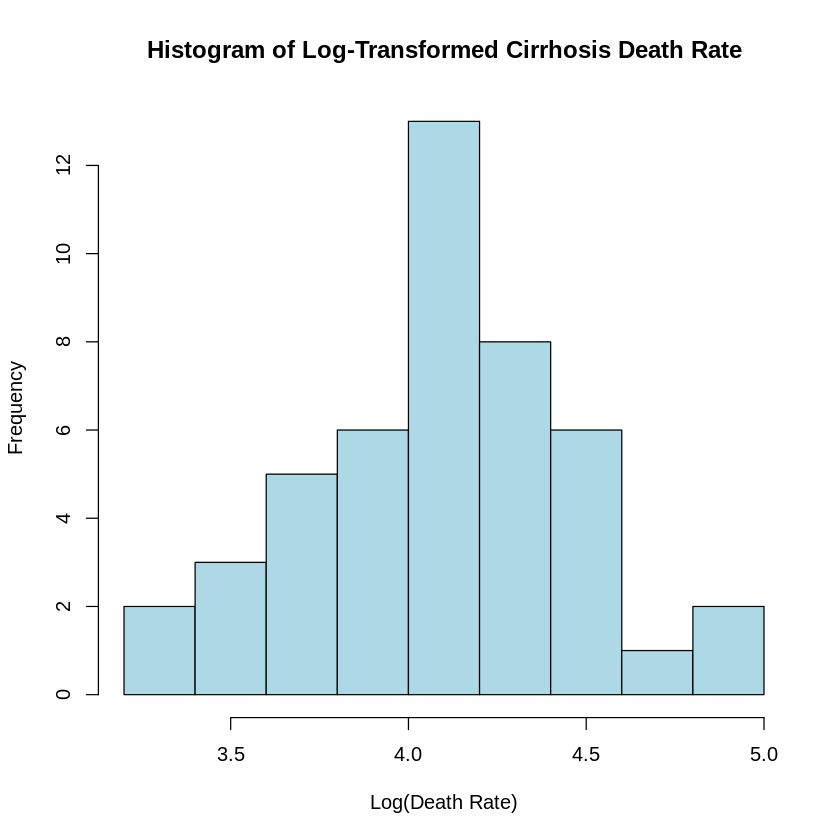


	Shapiro-Wilk normality test

data:  log_death_rate
W = 0.98405, p-value = 0.773

Mean of log-transformed data: 4.086 
Standard deviation of log-transformed data: 0.3662 


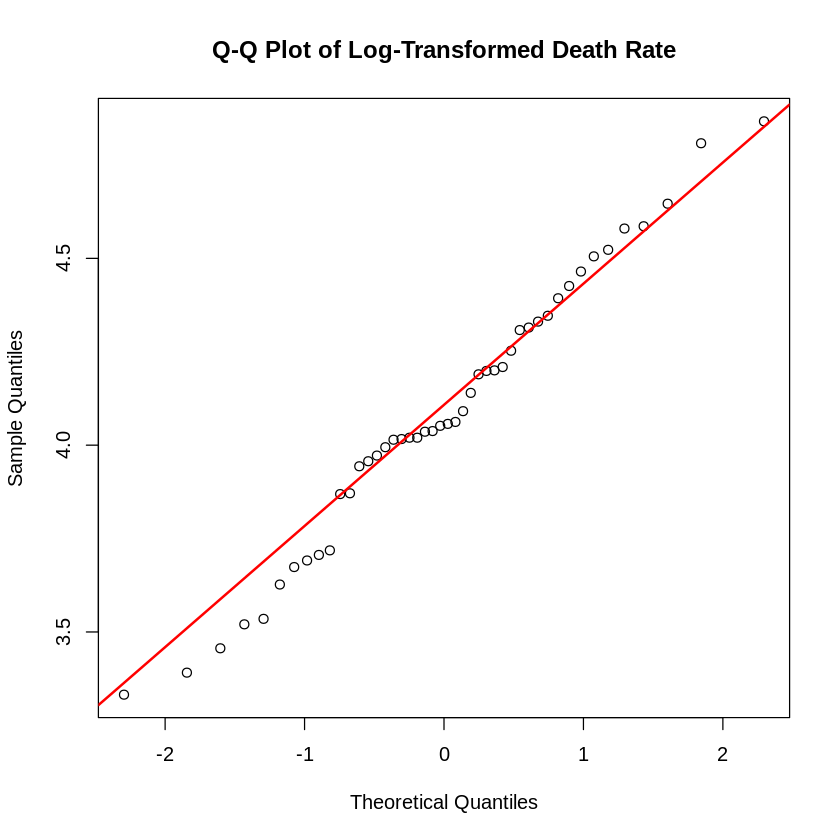

In [ ]:
# Cirrhosis death rate data
death_rate <- c(41.2, 31.7, 39.4, 57.5, 74.8, 59.8, 54.3, 47.9, 77.2, 56.6,
                80.9, 34.3, 53.1, 55.4, 57.8, 62.8, 67.3, 56.7, 37.6, 129.9,
                70.3, 104.2, 83.6, 66.0, 52.3, 86.9, 66.6, 40.1, 55.7, 58.1,
                74.3, 98.1, 40.7, 66.7, 48.0, 122.5, 92.1, 76.0, 97.5, 33.8,
                90.5, 29.7, 28.0, 51.6, 55.7, 55.5)

# Step 1: Apply natural log transformation
log_death_rate <- log(death_rate)

# Step 2: Plot histogram of log-transformed data
hist(log_death_rate,
     main = "Histogram of Log-Transformed Cirrhosis Death Rate",
     xlab = "Log(Death Rate)",
     ylab = "Frequency",
     col = "lightblue",
     border = "black")
#curve(dnorm(x, mean = mean(log_death_rate), sd = sd(log_death_rate)),
      #(col = "red", lwd = 2, add = TRUE)

# Step 3: Q-Q plot to check normality
qqnorm(log_death_rate, main = "Q-Q Plot of Log-Transformed Death Rate")
qqline(log_death_rate, col = "red", lwd = 2)

# Step 4: Shapiro-Wilk Test for normality
shapiro_test_log <- shapiro.test(log_death_rate)
print(shapiro_test_log)

# Step 5: Display mean and standard deviation of log-transformed data
log_mean <- mean(log_death_rate)
log_sd <- sd(log_death_rate)

cat("Mean of log-transformed data:", round(log_mean, 4), "\n")
cat("Standard deviation of log-transformed data:", round(log_sd, 4), "\n")


**Square Transformation**

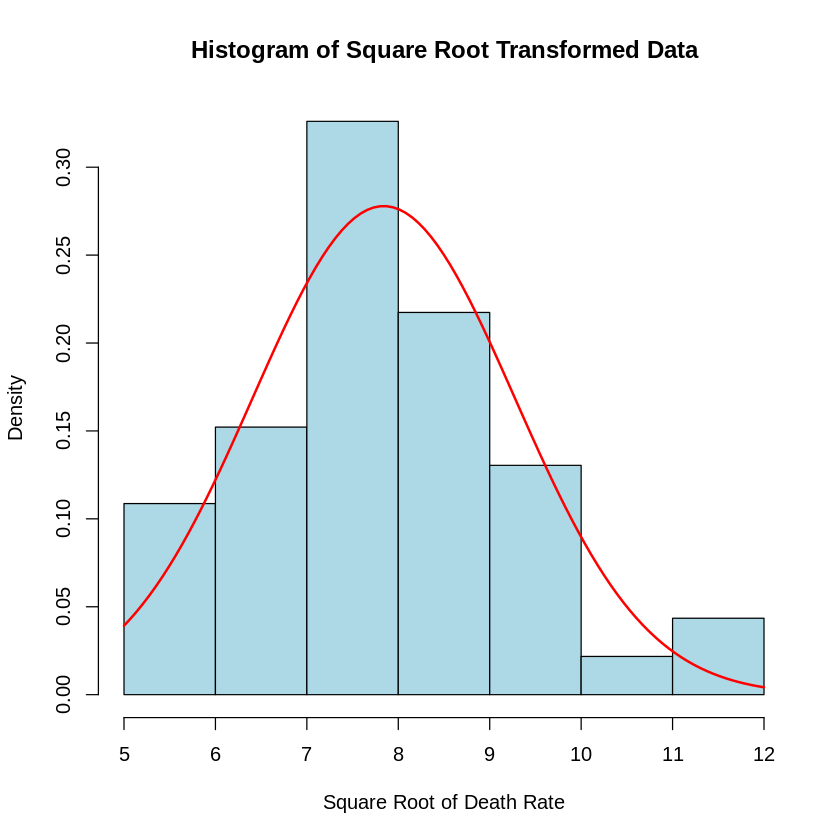


	Shapiro-Wilk normality test

data:  sqrt_death_rate
W = 0.97598, p-value = 0.4524


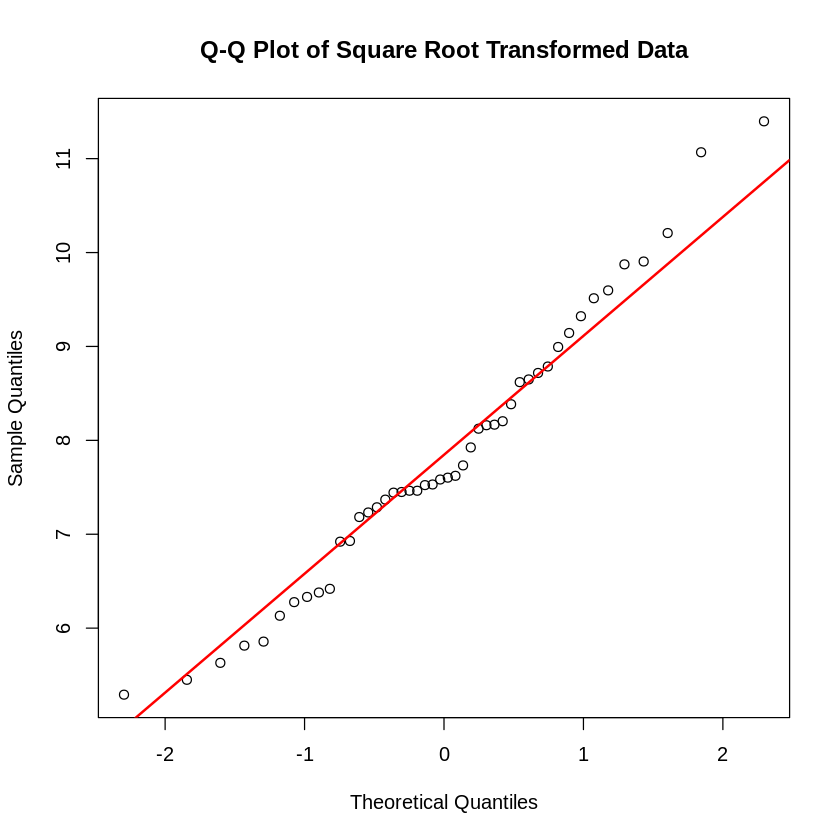

In [ ]:
# Square root transformation
sqrt_death_rate <- sqrt(death_rate)

# Histogram
hist(sqrt_death_rate, probability = TRUE, col = "lightblue",
     main = "Histogram of Square Root Transformed Data",
     xlab = "Square Root of Death Rate")
curve(dnorm(x, mean = mean(sqrt_death_rate), sd = sd(sqrt_death_rate)),
      col = "red", lwd = 2, add = TRUE)

# Q-Q plot
qqnorm(sqrt_death_rate, main = "Q-Q Plot of Square Root Transformed Data")
qqline(sqrt_death_rate, col = "red", lwd = 2)

# Shapiro-Wilk Test
shapiro.test(sqrt_death_rate)


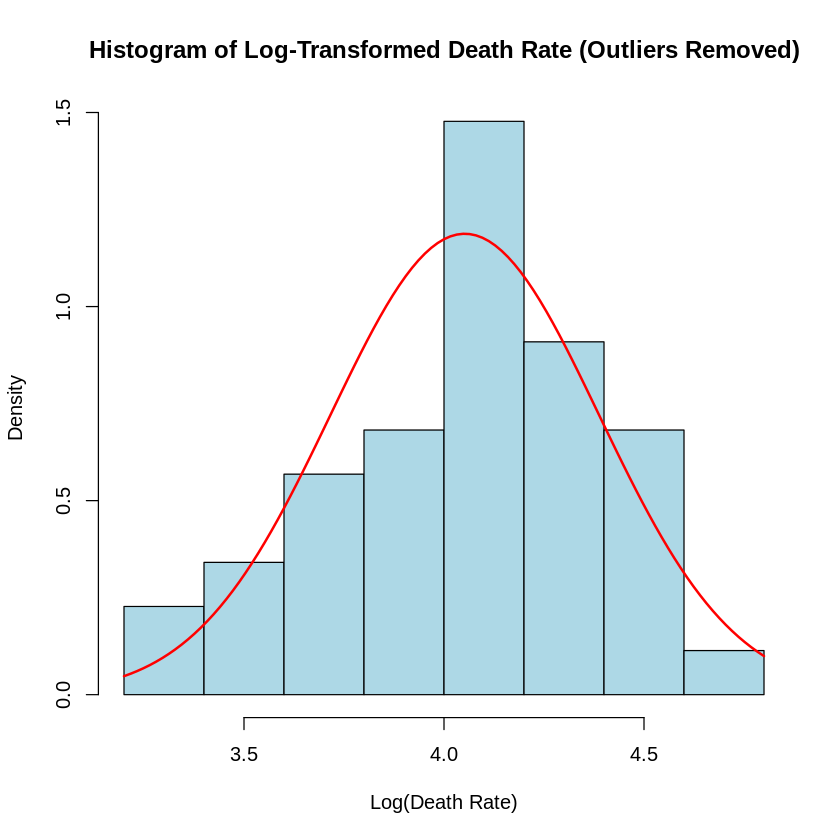


	Shapiro-Wilk normality test

data:  log_death_rate_clean
W = 0.97154, p-value = 0.3426


[1] 4.051845

[1] 0.3359287

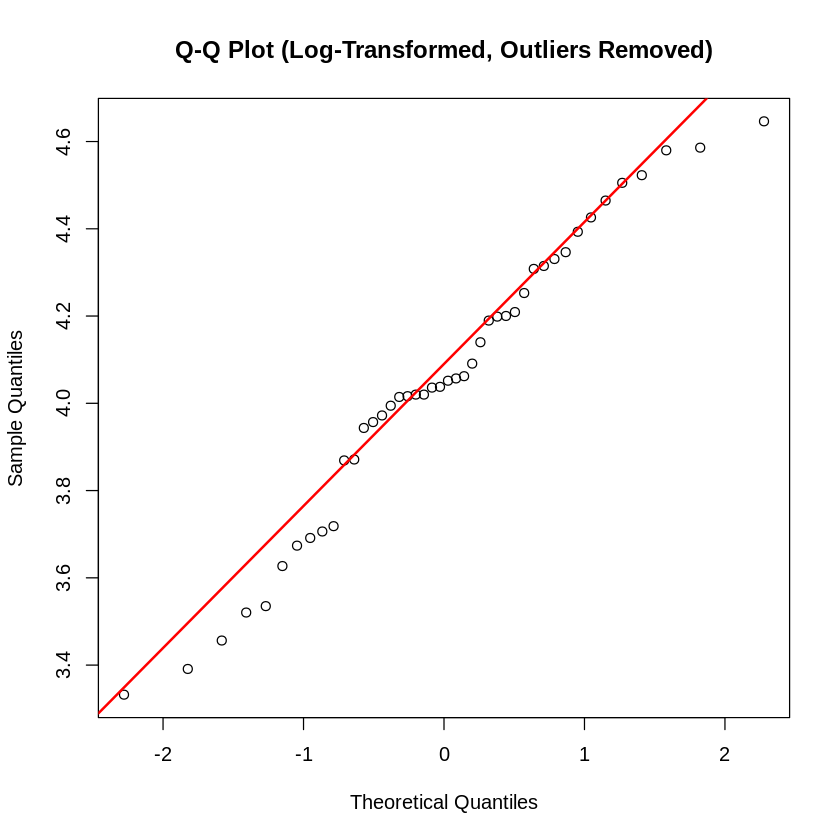

In [ ]:
# Original data
death_rate <- c(41.2, 31.7, 39.4, 57.5, 74.8, 59.8, 54.3, 47.9, 77.2, 56.6,
                80.9, 34.3, 53.1, 55.4, 57.8, 62.8, 67.3, 56.7, 37.6, 129.9,
                70.3, 104.2, 83.6, 66.0, 52.3, 86.9, 66.6, 40.1, 55.7, 58.1,
                74.3, 98.1, 40.7, 66.7, 48.0, 122.5, 92.1, 76.0, 97.5, 33.8,
                90.5, 29.7, 28.0, 51.6, 55.7, 55.5)

# Step 1: Remove the two outliers
death_rate_clean <- death_rate[!(death_rate %in% c(122.5, 129.9))]

# Step 2: Apply log transformation again
log_death_rate_clean <- log(death_rate_clean)

# Step 3: Plot histogram with normal curve
hist(log_death_rate_clean, probability = TRUE,
     main = "Histogram of Log-Transformed Death Rate (Outliers Removed)",
     xlab = "Log(Death Rate)", col = "lightblue", border = "black")
curve(dnorm(x, mean = mean(log_death_rate_clean), sd = sd(log_death_rate_clean)),
      col = "red", lwd = 2, add = TRUE)

# Step 4: Q-Q plot
qqnorm(log_death_rate_clean, main = "Q-Q Plot (Log-Transformed, Outliers Removed)")
qqline(log_death_rate_clean, col = "red", lwd = 2)

# Step 5: Shapiro-Wilk normality test
shapiro.test(log_death_rate_clean)

# Step 6: Show mean and standard deviation
mean(log_death_rate_clean)
sd(log_death_rate_clean)
